# Intro to Jupyter Notebooks

`pip install jupyter`

`jupyter notebook`

Notebook is a json file with extension: `*.ipynb`.


- New -> (options)
- Green -> Notebook running



- Edit mode: `Enter`
- Command mode: `Esc`
- Cell creation: `a` and `b`
- Delete cell: `d-d`
- Execute cell: `Shift + Enter`



- we can see the notebooks rendered it github: 
https://github.com/ricleal-fugue/tmp/blob/master/demo_pandas/Demo.ipynb


More info: https://jupyter.org/



## Magic functions

Magic functions: start with `%`, e.g. `%%time` and `%%timeit`


In [1]:
def fibonacci(n):
    if n<=0:
        print("Incorrect input")
    elif n==1:
        return 0
    elif n==2:
        return 1
    else:
        return fibonacci(n-1)+fibonacci(n-2)

In [2]:
# line scope (old ipython console style)

%timeit fibonacci(4)

823 ns ± 53.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [3]:
%%timeit

# cell scope


sum = 0
for i in [3, 4, 5]:
    sum += fibonacci(i)


2.68 µs ± 40.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Embedded plots

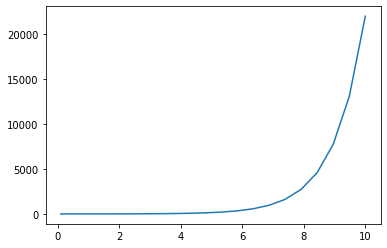

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 10, 20)
y = np.exp(x)

plt.plot(x, y)

## Tab completion

In [5]:
# tab
# plt.plot()

# shift+tab
# plt.plot()

## Shell command

In [6]:
# Note the !
!ls -la

total 44648
drwxr-xr-x  11 ricardol  staff      352 Oct  1 15:50 .
drwxr-xr-x  44 ricardol  staff     1408 Sep 30 12:31 ..
drwxr-xr-x   3 ricardol  staff       96 Sep  7 12:38 .ipynb_checkpoints
-rw-r--r--   1 ricardol  staff    24617 Oct  1 15:50 Demo.ipynb
-rw-r--r--   1 ricardol  staff    95099 Sep 20 09:35 compliance_report.285aea33-5cc8-4116-9c5e-b2f749ca675b.json
-rw-r--r--@  1 ricardol  staff  1351325 Sep  7 13:02 extract-2020-09-07_13-09-10.csv
-rw-r--r--@  1 ricardol  staff  9163265 Sep  8 09:00 extract-2020-09-08_08-09-08.csv
-rw-r--r--@  1 ricardol  staff  1815161 Sep  8 08:54 extract-2020-09-08_08-09-24.csv
-rw-r--r--@  1 ricardol  staff  5083420 Sep 22 08:29 extract-2020-09-22_08-09-41.csv
-rw-r--r--@  1 ricardol  staff  5198368 Sep 28 12:15 extract-2020-09-22_08-09-50.csv
drwxr-xr-x   8 ricardol  staff      256 Sep  7 12:33 venv


# Dev Tools

## `SAWS`

- https://github.com/donnemartin/saws

![https://camo.githubusercontent.com/2af72023269b0b320adf4ec55576435f5c8b79c4/687474703a2f2f692e696d6775722e636f6d2f767a43357a6d412e676966](https://camo.githubusercontent.com/2af72023269b0b320adf4ec55576435f5c8b79c4/687474703a2f2f692e696d6775722e636f6d2f767a43357a6d412e676966)

## `BAT` : A cat(1) clone with syntax highlighting and Git integration.

- https://github.com/sharkdp/bat

![](https://camo.githubusercontent.com/9d3d89364f2cc83ace8f29646a6236bc15ea1da0/68747470733a2f2f696d6775722e636f6d2f724773646e44652e706e67)

Git integration:

![](https://camo.githubusercontent.com/67e44f4a68150325f74b3a46820b7473ff7b91a6/68747470733a2f2f692e696d6775722e636f6d2f326c53573452452e706e67)

```
# Invisible chars
bat -A /etc/hosts

# Colored man pages
export MANPAGER="sh -c 'col -bx | bat -l man -p'"
man ls

```

## `mypy`: optional static type checker for Python


See [`resource_metrics`](https://github.com/LuminalHQ/risk-manager/tree/master/src/resource_metrics).


In the [https://github.com/LuminalHQ/risk-manager/blob/master/src/resource_metrics/Makefile](https://github.com/LuminalHQ/risk-manager/blob/master/src/resource_metrics/Makefile#L35):

<pre>

$(ACTIVATE) && pip install -q pytest==5.3.5 pytest-cov==2.8.1 <b>mypy==0.782</b>

<b>$(ACTIVATE) && MYPYPATH=$(MYPYPATH) PYTHONPATH=./src/$(name) mypy src/$(name)/</b>

$(ACTIVATE) && PYTHONPATH=./src/$(name) py.test --cov-report term-missing --cov=$(name) src/$(name)/resource_metrics_tests

</pre>

### Run it as:

```sh
$ make -f src/resource_metrics/Makefile test
```

You can use a `# type: ignore` comment to silence the type checker on a particular line. 

For example, in the code ([`src/resource_metrics/resource_metrics_tests/test_resources_counts.py`](https://github.com/LuminalHQ/risk-manager/blob/master/src/resource_metrics/resource_metrics_tests/test_resources_counts.py#L7)) the Swagger generated files were silenced:

```python
from domain.gen_models import (AdminListTenantsInput,   # type: ignore
```

# Introduction to Pandas

> In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

- data manipulation and analysis
- numerical tables and time series

Mike use it heavily on the generation of reports.

In [7]:
# install pandas
# !pip install pandas -U

In [8]:
import pandas as pd
from pandas import json_normalize
from pprint import pprint
import json
import numpy as np

In [9]:
d = {
    'A': [1, 2, 3],
    'B': [3.1, 4.2, 5.3],
    'C': ['x', 'y', 'z'],
    'D': [[10, 11], [22,23,24], [35, 36, 37]]
}

In [10]:
df = pd.DataFrame(d)
# Note the default index
df

,A,B,C,D
0,1,3.1,x,"[10, 11]"
1,2,4.2,y,"[22, 23, 24]"
2,3,5.3,z,"[35, 36, 37]"


In [11]:
# Characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      int64  
 1   B       3 non-null      float64
 2   C       3 non-null      object 
 3   D       3 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 224.0+ bytes


In [12]:
# Column access: Data series
df['A']

0    1
1    2
2    3
Name: A, dtype: int64

In [13]:
# Column access: Data Frame
df[['A']]

,A
0,1
1,2
2,3


In [14]:
# Multi-Column access
df[['A','B']]

,A,B
0,1,3.1
1,2,4.2
2,3,5.3


In [15]:
# Let's get the first row by index name
df.loc[[0]]

,A,B,C,D
0,1,3.1,x,"[10, 11]"


In [16]:
# Let's get the first two rows by position
df.iloc[:2]

,A,B,C,D
0,1,3.1,x,"[10, 11]"
1,2,4.2,y,"[22, 23, 24]"


In [17]:
# Element access
df['D'][2]

[35, 36, 37]

In [18]:
# Let's create a time series
dates = pd.date_range(start='1/1/2020', periods=3, tz='America/New_York')
dates

DatetimeIndex(['2020-01-01 00:00:00-05:00', '2020-01-02 00:00:00-05:00',
               '2020-01-03 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq='D')

In [19]:
df.index = dates
df

,A,B,C,D
2020-01-01 00:00:00-05:00,1,3.1,x,"[10, 11]"
2020-01-02 00:00:00-05:00,2,4.2,y,"[22, 23, 24]"
2020-01-03 00:00:00-05:00,3,5.3,z,"[35, 36, 37]"


In [20]:
# Characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2020-01-01 00:00:00-05:00 to 2020-01-03 00:00:00-05:00
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      int64  
 1   B       3 non-null      float64
 2   C       3 non-null      object 
 3   D       3 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 120.0+ bytes


In [21]:
# statistics
df.describe()

,A,B
count,3.0,3.00
mean,2.0,4.20
std,1.0,1.10
min,1.0,3.10
25%,1.5,3.65
50%,2.0,4.20
75%,2.5,4.75
max,3.0,5.30


In [22]:
# explode only works on lists!!!
df.explode('D')

,A,B,C,D
2020-01-01 00:00:00-05:00,1,3.1,x,10
2020-01-01 00:00:00-05:00,1,3.1,x,11
2020-01-02 00:00:00-05:00,2,4.2,y,22
2020-01-02 00:00:00-05:00,2,4.2,y,23
2020-01-02 00:00:00-05:00,2,4.2,y,24
2020-01-03 00:00:00-05:00,3,5.3,z,35
2020-01-03 00:00:00-05:00,3,5.3,z,36
2020-01-03 00:00:00-05:00,3,5.3,z,37


In [23]:
# The majory of operations are immutable
df

,A,B,C,D
2020-01-01 00:00:00-05:00,1,3.1,x,"[10, 11]"
2020-01-02 00:00:00-05:00,2,4.2,y,"[22, 23, 24]"
2020-01-03 00:00:00-05:00,3,5.3,z,"[35, 36, 37]"


In [24]:
# Transform the DF into JSON
df.to_json()

'{"A":{"1577854800000":1,"1577941200000":2,"1578027600000":3},"B":{"1577854800000":3.1,"1577941200000":4.2,"1578027600000":5.3},"C":{"1577854800000":"x","1577941200000":"y","1578027600000":"z"},"D":{"1577854800000":[10,11],"1577941200000":[22,23,24],"1578027600000":[35,36,37]}}'

In [25]:
# Format {Column : {index: value1}, {index: value2}, etc..}
pprint(
    df.to_dict()
)

{'A': {Timestamp('2020-01-01 00:00:00-0500', tz='America/New_York', freq='D'): 1,
       Timestamp('2020-01-02 00:00:00-0500', tz='America/New_York', freq='D'): 2,
       Timestamp('2020-01-03 00:00:00-0500', tz='America/New_York', freq='D'): 3},
 'B': {Timestamp('2020-01-01 00:00:00-0500', tz='America/New_York', freq='D'): 3.1,
       Timestamp('2020-01-02 00:00:00-0500', tz='America/New_York', freq='D'): 4.2,
       Timestamp('2020-01-03 00:00:00-0500', tz='America/New_York', freq='D'): 5.3},
 'C': {Timestamp('2020-01-01 00:00:00-0500', tz='America/New_York', freq='D'): 'x',
       Timestamp('2020-01-02 00:00:00-0500', tz='America/New_York', freq='D'): 'y',
       Timestamp('2020-01-03 00:00:00-0500', tz='America/New_York', freq='D'): 'z'},
 'D': {Timestamp('2020-01-01 00:00:00-0500', tz='America/New_York', freq='D'): [10,
                                                                                11],
       Timestamp('2020-01-02 00:00:00-0500', tz='America/New_York', freq='D'):

In [26]:
pprint(
    df.to_dict('list'),
    width=40
)

{'A': [1, 2, 3],
 'B': [3.1, 4.2, 5.3],
 'C': ['x', 'y', 'z'],
 'D': [[10, 11],
       [22, 23, 24],
       [35, 36, 37]]}


In [27]:
pprint(
    df.to_dict('records'),
    width=40
)

[{'A': 1,
  'B': 3.1,
  'C': 'x',
  'D': [10, 11]},
 {'A': 2,
  'B': 4.2,
  'C': 'y',
  'D': [22, 23, 24]},
 {'A': 3,
  'B': 5.3,
  'C': 'z',
  'D': [35, 36, 37]}]


# Real example: DataDog

In [28]:
# pd.set_option('max_colwidth', 500)
# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 999

In [29]:
df_dd = pd.read_csv('extract-2020-09-22_08-09-50.csv')

## Functions to examine the Dataframe

In [30]:
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     5000 non-null   object
 1   Host     4886 non-null   object
 2   Service  871 non-null    object
 3   Message  4868 non-null   object
 4   message  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [31]:
df_dd.head()

,date,Host,Service,Message,message
0,2020-09-21T13:30:28.618Z,arn:aws:lambda:us-east-1:810369035479:function...,finish-scheduled-task,Invocation ended after 148 ms,"{""msg"":""Invocation ended after 148 ms"",""lambda..."
1,2020-09-21T13:30:28.470Z,arn:aws:lambda:us-east-1:810369035479:function...,finish-scheduled-task,Invocation started: finish_task,"{""msg"":""Invocation started: finish_task"",""lamb..."
2,2020-09-21T13:30:28.432Z,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,Invocation ended after 81 ms,"{""msg"":""Invocation ended after 81 ms"",""lambda""..."
3,2020-09-21T13:30:28.389Z,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,NotFound: environment:b098f941-9d8d-4860-8929-...,"{""msg"":""NotFound: environment:b098f941-9d8d-48..."
4,2020-09-21T13:30:28.351Z,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,Invocation started: run_reports,"{""msg"":""Invocation started: run_reports"",""lamb..."


In [32]:
df_dd.tail()

,date,Host,Service,Message,message
4995,2020-09-21T13:27:44.647Z,arn:aws:lambda:us-east-1:810369035479:function...,scan-resources-filter,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."
4996,2020-09-21T13:27:44.646Z,arn:aws:lambda:us-east-1:810369035479:function...,scan-compliance-by-rules-filter,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."
4997,2020-09-21T13:27:44.646Z,arn:aws:lambda:us-east-1:810369035479:function...,fugue-risk-manager-frontend-api-get-scan-status,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."
4998,2020-09-21T13:27:44.646Z,arn:aws:lambda:us-east-1:810369035479:function...,fugue-risk-manager-frontend-api-get-scan-status,Invocation started: get_scan_status_handler,"{""msg"":""Invocation started: get_scan_status_ha..."
4999,2020-09-21T13:27:44.646Z,arn:aws:lambda:us-east-1:810369035479:function...,scan-resources-filter,Invocation started: get_scan_resources_filter_...,"{""msg"":""Invocation started: get_scan_resources..."


In [33]:
df_dd.columns

Index(['date', 'Host', 'Service', 'Message', 'message'], dtype='object')

## Change the index

In [34]:
df_dd.index = df_dd['date'].astype('datetime64[ns]') 
df_dd

,date,Host,Service,Message,message
date,,,,,
2020-09-21 13:30:28.618,2020-09-21T13:30:28.618Z,arn:aws:lambda:us-east-1:810369035479:function...,finish-scheduled-task,Invocation ended after 148 ms,"{""msg"":""Invocation ended after 148 ms"",""lambda..."
2020-09-21 13:30:28.470,2020-09-21T13:30:28.470Z,arn:aws:lambda:us-east-1:810369035479:function...,finish-scheduled-task,Invocation started: finish_task,"{""msg"":""Invocation started: finish_task"",""lamb..."
2020-09-21 13:30:28.432,2020-09-21T13:30:28.432Z,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,Invocation ended after 81 ms,"{""msg"":""Invocation ended after 81 ms"",""lambda""..."
2020-09-21 13:30:28.389,2020-09-21T13:30:28.389Z,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,NotFound: environment:b098f941-9d8d-4860-8929-...,"{""msg"":""NotFound: environment:b098f941-9d8d-48..."
2020-09-21 13:30:28.351,2020-09-21T13:30:28.351Z,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,Invocation started: run_reports,"{""msg"":""Invocation started: run_reports"",""lamb..."
...,...,...,...,...,...
2020-09-21 13:27:44.647,2020-09-21T13:27:44.647Z,arn:aws:lambda:us-east-1:810369035479:function...,scan-resources-filter,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."
2020-09-21 13:27:44.646,2020-09-21T13:27:44.646Z,arn:aws:lambda:us-east-1:810369035479:function...,scan-compliance-by-rules-filter,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."
2020-09-21 13:27:44.646,2020-09-21T13:27:44.646Z,arn:aws:lambda:us-east-1:810369035479:function...,fugue-risk-manager-frontend-api-get-scan-status,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."


In [35]:
# Use our local time
df_dd.index = df_dd.index.tz_localize('UTC').tz_convert('US/Eastern')
df_dd

,date,Host,Service,Message,message
date,,,,,
2020-09-21 09:30:28.618000-04:00,2020-09-21T13:30:28.618Z,arn:aws:lambda:us-east-1:810369035479:function...,finish-scheduled-task,Invocation ended after 148 ms,"{""msg"":""Invocation ended after 148 ms"",""lambda..."
2020-09-21 09:30:28.470000-04:00,2020-09-21T13:30:28.470Z,arn:aws:lambda:us-east-1:810369035479:function...,finish-scheduled-task,Invocation started: finish_task,"{""msg"":""Invocation started: finish_task"",""lamb..."
2020-09-21 09:30:28.432000-04:00,2020-09-21T13:30:28.432Z,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,Invocation ended after 81 ms,"{""msg"":""Invocation ended after 81 ms"",""lambda""..."
2020-09-21 09:30:28.389000-04:00,2020-09-21T13:30:28.389Z,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,NotFound: environment:b098f941-9d8d-4860-8929-...,"{""msg"":""NotFound: environment:b098f941-9d8d-48..."
2020-09-21 09:30:28.351000-04:00,2020-09-21T13:30:28.351Z,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,Invocation started: run_reports,"{""msg"":""Invocation started: run_reports"",""lamb..."
...,...,...,...,...,...
2020-09-21 09:27:44.647000-04:00,2020-09-21T13:27:44.647Z,arn:aws:lambda:us-east-1:810369035479:function...,scan-resources-filter,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."
2020-09-21 09:27:44.646000-04:00,2020-09-21T13:27:44.646Z,arn:aws:lambda:us-east-1:810369035479:function...,scan-compliance-by-rules-filter,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."
2020-09-21 09:27:44.646000-04:00,2020-09-21T13:27:44.646Z,arn:aws:lambda:us-east-1:810369035479:function...,fugue-risk-manager-frontend-api-get-scan-status,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."


In [36]:
# check the type of the index
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2020-09-21 09:30:28.618000-04:00 to 2020-09-21 09:27:44.646000-04:00
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     5000 non-null   object
 1   Host     4886 non-null   object
 2   Service  871 non-null    object
 3   Message  4868 non-null   object
 4   message  5000 non-null   object
dtypes: object(5)
memory usage: 234.4+ KB


In [37]:
# get rid of the old data
df_dd = df_dd.drop('date', axis=1)
df_dd

,Host,Service,Message,message
date,,,,
2020-09-21 09:30:28.618000-04:00,arn:aws:lambda:us-east-1:810369035479:function...,finish-scheduled-task,Invocation ended after 148 ms,"{""msg"":""Invocation ended after 148 ms"",""lambda..."
2020-09-21 09:30:28.470000-04:00,arn:aws:lambda:us-east-1:810369035479:function...,finish-scheduled-task,Invocation started: finish_task,"{""msg"":""Invocation started: finish_task"",""lamb..."
2020-09-21 09:30:28.432000-04:00,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,Invocation ended after 81 ms,"{""msg"":""Invocation ended after 81 ms"",""lambda""..."
2020-09-21 09:30:28.389000-04:00,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,NotFound: environment:b098f941-9d8d-4860-8929-...,"{""msg"":""NotFound: environment:b098f941-9d8d-48..."
2020-09-21 09:30:28.351000-04:00,arn:aws:lambda:us-east-1:810369035479:function...,reporting-run-report,Invocation started: run_reports,"{""msg"":""Invocation started: run_reports"",""lamb..."
...,...,...,...,...
2020-09-21 09:27:44.647000-04:00,arn:aws:lambda:us-east-1:810369035479:function...,scan-resources-filter,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."
2020-09-21 09:27:44.646000-04:00,arn:aws:lambda:us-east-1:810369035479:function...,scan-compliance-by-rules-filter,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."
2020-09-21 09:27:44.646000-04:00,arn:aws:lambda:us-east-1:810369035479:function...,fugue-risk-manager-frontend-api-get-scan-status,78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc...,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::..."


In [38]:
# we are interested in the messages
# This is a data series!
ds = df_dd['message']
ds

date
2020-09-21 09:30:28.618000-04:00    {"msg":"Invocation ended after 148 ms","lambda...
2020-09-21 09:30:28.470000-04:00    {"msg":"Invocation started: finish_task","lamb...
2020-09-21 09:30:28.432000-04:00    {"msg":"Invocation ended after 81 ms","lambda"...
2020-09-21 09:30:28.389000-04:00    {"msg":"NotFound: environment:b098f941-9d8d-48...
2020-09-21 09:30:28.351000-04:00    {"msg":"Invocation started: run_reports","lamb...
                                                          ...                        
2020-09-21 09:27:44.647000-04:00    {"msg":"78a8f187-1e2e-4339-9685-b6cdc18f0d77::...
2020-09-21 09:27:44.646000-04:00    {"msg":"78a8f187-1e2e-4339-9685-b6cdc18f0d77::...
2020-09-21 09:27:44.646000-04:00    {"msg":"78a8f187-1e2e-4339-9685-b6cdc18f0d77::...
2020-09-21 09:27:44.646000-04:00    {"msg":"Invocation started: get_scan_status_ha...
2020-09-21 09:27:44.646000-04:00    {"msg":"Invocation started: get_scan_resources...
Name: message, Length: 5000, dtype: object

In [39]:
# This is a dataframe: Note the double brackets [[]]
df = df_dd[['message']]
pd.set_option('max_colwidth', 500)
df

,message
date,
2020-09-21 09:30:28.618000-04:00,"{""msg"":""Invocation ended after 148 ms"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:finish-scheduled-task""},""component"":""risk-manager"",""service"":""finish-scheduled-task"",""host"":""arn:aws:lambda:us-east-1:810369035479:function:finish-scheduled-task"",""log_level"":""INFO"",""id"":""35696691973764701903025011185050825062615910776946491394"",""aws"":{""awslogs"":{""owner"":""810369035479"",""logGroup"":""/aws/lambda/finish-scheduled-task"",""logStream"":""2020/09/21/[$LATEST]1f766bb170f04758b49f2f4413..."
2020-09-21 09:30:28.470000-04:00,"{""msg"":""Invocation started: finish_task"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:finish-scheduled-task""},""component"":""risk-manager"",""service"":""finish-scheduled-task"",""host"":""arn:aws:lambda:us-east-1:810369035479:function:finish-scheduled-task"",""log_level"":""INFO"",""id"":""35696691970486492358841009583245074476536601635567370241"",""aws"":{""awslogs"":{""owner"":""810369035479"",""logGroup"":""/aws/lambda/finish-scheduled-task"",""logStream"":""2020/09/21/[$LATEST]1f766bb170f04758b49f2f44..."
2020-09-21 09:30:28.432000-04:00,"{""msg"":""Invocation ended after 81 ms"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""service"":""reporting-run-report"",""host"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report"",""log_level"":""INFO"",""id"":""35696691969616763296098315280587475096694044065221050371"",""aws"":{""awslogs"":{""owner"":""810369035479"",""logGroup"":""/aws/lambda/reporting-run-report"",""logStream"":""2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d73b75..."
2020-09-21 09:30:28.389000-04:00,"{""msg"":""NotFound: environment:b098f941-9d8d-4860-8929-6fbf31f606c8"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""error_detail"":[""Traceback (most recent call last):"",""File \""/var/task/domain/base.py\"", line 657, in wrapper\n components, request_handler, event, '_')"",""File \""/var/task/domain/base.py\"", line 547, in execute_batch_request\n ), event, source)"",""File \""/var/task/domain/base.py\"", line 458, in wrapper\n ..."
2020-09-21 09:30:28.351000-04:00,"{""msg"":""Invocation started: run_reports"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""service"":""reporting-run-report"",""host"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report"",""log_level"":""INFO"",""id"":""35696691967810402935017334806123081916609526783236636673"",""aws"":{""awslogs"":{""owner"":""810369035479"",""logGroup"":""/aws/lambda/reporting-run-report"",""logStream"":""2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d73..."
...,...
2020-09-21 09:27:44.647000-04:00,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc427ea6-f606-4133-9365-fed090b6eaef => environment::GetScanResourcesFilter::environment:65409caf-414b-4642-8e53-b413a3dcf2bc, Has access=True"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:scan-resources-filter""},""component"":""risk-manager"",""service"":""scan-resources-filter"",""log_level"":""INFO"",""host"":""arn:aws:lambda:us-east-1:810369035479:function:scan-resources-filter"",""id"":""356966883170892109547602038462478135772782968938..."
2020-09-21 09:27:44.646000-04:00,"{""msg"":""78a8f187-1e2e-4339-9685-b6cdc18f0d77::owner:cc427ea6-f606-4133-9365-fed090b6eaef => environment::GetScanComplianceByResourcesFilter::environment:65409caf-414b-4642-8e53-b413a3dcf2bc, Has access=True"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:scan-compliance-by-rules-filter""},""component"":""risk-manager"",""service"":""scan-compliance-by-rules-filter"",""log_level"":""INFO"",""host"":""arn:aws:lambda:us-east-1:810369035479:function:scan-compliance-by-rules-fil

In [40]:
# get it back to default
pd.set_option('max_colwidth', 50)

In [41]:
# Let's get only 'log_level' == 'ERROR'

condition = df['message'].map(
    lambda x: json.loads(x).get('log_level') == 'ERROR'
)
condition

date
2020-09-21 09:30:28.618000-04:00    False
2020-09-21 09:30:28.470000-04:00    False
2020-09-21 09:30:28.432000-04:00    False
2020-09-21 09:30:28.389000-04:00     True
2020-09-21 09:30:28.351000-04:00    False
                                    ...  
2020-09-21 09:27:44.647000-04:00    False
2020-09-21 09:27:44.646000-04:00    False
2020-09-21 09:27:44.646000-04:00    False
2020-09-21 09:27:44.646000-04:00    False
2020-09-21 09:27:44.646000-04:00    False
Name: message, Length: 5000, dtype: bool

In [42]:
df_error = df[condition]
len(df_error)

19

In [43]:
pd.set_option('max_colwidth', 250)
df_error

,message
date,
2020-09-21 09:30:28.389000-04:00,"{""msg"":""NotFound: environment:b098f941-9d8d-4860-8929-6fbf31f606c8"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""error_detail"":[""Traceback (most recent call last):"",""File \""/va..."
2020-09-21 09:30:23.069000-04:00,"{""msg"":""NotFound: environment:b098f941-9d8d-4860-8929-6fbf31f606c8"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""error_detail"":[""Traceback (most recent call last):"",""File \""/va..."
2020-09-21 09:30:19.205000-04:00,"{""msg"":""NotFound: environment:b098f941-9d8d-4860-8929-6fbf31f606c8"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""error_detail"":[""Traceback (most recent call last):"",""File \""/va..."
2020-09-21 09:30:19.061000-04:00,"{""msg"":""NotFound: environment:fbd9039b-7664-443f-ae8f-239d38cf6afc"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""error_detail"":[""Traceback (most recent call last):"",""File \""/va..."
2020-09-21 09:29:49.552000-04:00,"{""msg"":""NotFound: environment:9f583733-e83f-4701-9585-b0dee32f3ee1"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""error_detail"":[""Traceback (most recent call last):"",""File \""/va..."
2020-09-21 09:29:35.562000-04:00,"{""msg"":""NotFound: environment:b098f941-9d8d-4860-8929-6fbf31f606c8"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""error_detail"":[""Traceback (most recent call last):"",""File \""/va..."
2020-09-21 09:29:28.581000-04:00,"{""msg"":""NotFound: environment:b098f941-9d8d-4860-8929-6fbf31f606c8"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""error_detail"":[""Traceback (most recent call last):"",""File \""/va..."
2020-09-21 09:29:01.551000-04:00,"{""msg"":""NotFound: environment:44fc82be-7040-43e6-b15b-71741229d457"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""error_detail"":[""Traceback (most recent call last):"",""File \""/va..."
2020-09-21 09:28:54.934000-04:00,"{""msg"":""NotFound: environment:d46eb4e3-fc32-4068-8877-35ac167ac092"",""lambda"":{""arn"":""arn:aws:lambda:us-east-1:810369035479:function:reporting-run-report""},""component"":""risk-manager"",""error_detail"":[""Traceback (most recent call last):"",""File \""/va..."


In [44]:
pd.set_option('max_colwidth', 50)

In [45]:
# json_normalize -> Normalize semi-structured JSON data into a flat table.
df_n = json_normalize([json.loads(j) for j in df_error['message']])
df_n

,msg,component,error_detail,service,log_level,host,id,timestamp,lambda.arn,aws.awslogs.owner,aws.awslogs.logGroup,aws.awslogs.logStream,aws.invoked_function_arn,aws.function_version
0,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669196865783125256149848550143921097016452...,2020-09-21T13:30:28.389,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
1,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669185001786679637858336126420663557114943...,2020-09-21T13:30:23.069,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
2,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669176384778734925625554237019123005788057...,2020-09-21T13:30:19.205,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
3,NotFound: environment:fbd9039b-7664-443f-ae8f-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669176065878078586637643313058351706916488...,2020-09-21T13:30:19.061,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
4,NotFound: environment:9f583733-e83f-4701-9585-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669110258609072242621811388976961024014728...,2020-09-21T13:29:49.552,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
5,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669079057636464978426971527384810294924881...,2020-09-21T13:29:35.562,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
6,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669063489486241884198956421299884159103714...,2020-09-21T13:29:28.581,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
7,NotFound: environment:44fc82be-7040-43e6-b15b-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669003210571970255924600785929891057192688...,2020-09-21T13:29:01.551,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
8,NotFound: environment:d46eb4e3-f

In [46]:
# get the index back
assert len(df_error) == len(df_n)

df_n.index = df_error.index
df_n.index.name = 'date'
df_n

,msg,component,error_detail,service,log_level,host,id,timestamp,lambda.arn,aws.awslogs.owner,aws.awslogs.logGroup,aws.awslogs.logStream,aws.invoked_function_arn,aws.function_version
date,,,,,,,,,,,,,,
2020-09-21 09:30:28.389000-04:00,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669196865783125256149848550143921097016452...,2020-09-21T13:30:28.389,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
2020-09-21 09:30:23.069000-04:00,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669185001786679637858336126420663557114943...,2020-09-21T13:30:23.069,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
2020-09-21 09:30:19.205000-04:00,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669176384778734925625554237019123005788057...,2020-09-21T13:30:19.205,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
2020-09-21 09:30:19.061000-04:00,NotFound: environment:fbd9039b-7664-443f-ae8f-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669176065878078586637643313058351706916488...,2020-09-21T13:30:19.061,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
2020-09-21 09:29:49.552000-04:00,NotFound: environment:9f583733-e83f-4701-9585-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669110258609072242621811388976961024014728...,2020-09-21T13:29:49.552,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
2020-09-21 09:29:35.562000-04:00,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669079057636464978426971527384810294924881...,2020-09-21T13:29:35.562,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
2020-09-21 09:29:28.581000-04:00,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669063489486241884198956421299884159103714...,2020-09-21T13:29:28.581,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST
2020-09-21 09:29:01.551000-04:00,NotFound: environment:44fc82be-7040-43e6-b15b-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,356966900321057197025592460078592989105719268

In [47]:
# The errors are all similar
# Look at the first row of 'msg'
df_n['msg'][0]

'NotFound: environment:b098f941-9d8d-4860-8929-6fbf31f606c8'

In [48]:
# Let's get the environment_id for every error:

import re

# filter function
def get_env_id(s: str):
    regex = ".*([a-fA-F0-9]{8}-[a-fA-F0-9]{4}-[a-fA-F0-9]{4}-[a-fA-F0-9]{4}-[a-fA-F0-9]{12})"

    found = re.match(regex, s)
    if found:
        return found.group(1)
    return None


df_n['msg'].apply(get_env_id)

date
2020-09-21 09:30:28.389000-04:00    b098f941-9d8d-4860-8929-6fbf31f606c8
2020-09-21 09:30:23.069000-04:00    b098f941-9d8d-4860-8929-6fbf31f606c8
2020-09-21 09:30:19.205000-04:00    b098f941-9d8d-4860-8929-6fbf31f606c8
2020-09-21 09:30:19.061000-04:00    fbd9039b-7664-443f-ae8f-239d38cf6afc
2020-09-21 09:29:49.552000-04:00    9f583733-e83f-4701-9585-b0dee32f3ee1
2020-09-21 09:29:35.562000-04:00    b098f941-9d8d-4860-8929-6fbf31f606c8
2020-09-21 09:29:28.581000-04:00    b098f941-9d8d-4860-8929-6fbf31f606c8
2020-09-21 09:29:01.551000-04:00    44fc82be-7040-43e6-b15b-71741229d457
2020-09-21 09:28:54.934000-04:00    d46eb4e3-fc32-4068-8877-35ac167ac092
2020-09-21 09:28:38.266000-04:00    7a6d1541-e89f-4656-9e99-cf11aaa42e1e
2020-09-21 09:28:31.545000-04:00    610faacc-9f8b-4cf2-8ac2-177cecb5e662
2020-09-21 09:28:30.380000-04:00    92c1a70a-ad53-46f6-958f-2a16fbe07520
2020-09-21 09:28:24.969000-04:00    25100acb-c5b9-4c54-a8a7-9433e0765507
2020-09-21 09:28:08.944000-04:00    25100acb-c

In [49]:
# Let's create new column with environment_id
df_n['environment_id'] = df_n['msg'].apply(get_env_id)
df_n

,msg,component,error_detail,service,log_level,host,id,timestamp,lambda.arn,aws.awslogs.owner,aws.awslogs.logGroup,aws.awslogs.logStream,aws.invoked_function_arn,aws.function_version,environment_id
date,,,,,,,,,,,,,,,
2020-09-21 09:30:28.389000-04:00,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669196865783125256149848550143921097016452...,2020-09-21T13:30:28.389,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST,b098f941-9d8d-4860-8929-6fbf31f606c8
2020-09-21 09:30:23.069000-04:00,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669185001786679637858336126420663557114943...,2020-09-21T13:30:23.069,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST,b098f941-9d8d-4860-8929-6fbf31f606c8
2020-09-21 09:30:19.205000-04:00,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669176384778734925625554237019123005788057...,2020-09-21T13:30:19.205,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST,b098f941-9d8d-4860-8929-6fbf31f606c8
2020-09-21 09:30:19.061000-04:00,NotFound: environment:fbd9039b-7664-443f-ae8f-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669176065878078586637643313058351706916488...,2020-09-21T13:30:19.061,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST,fbd9039b-7664-443f-ae8f-239d38cf6afc
2020-09-21 09:29:49.552000-04:00,NotFound: environment:9f583733-e83f-4701-9585-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669110258609072242621811388976961024014728...,2020-09-21T13:29:49.552,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST,9f583733-e83f-4701-9585-b0dee32f3ee1
2020-09-21 09:29:35.562000-04:00,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669079057636464978426971527384810294924881...,2020-09-21T13:29:35.562,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST,b098f941-9d8d-4860-8929-6fbf31f606c8
2020-09-21 09:29:28.581000-04:00,NotFound: environment:b098f941-9d8d-4860-8929-...,risk-manager,"[Traceback (most recent call last):, File ""/va...",reporting-run-report,ERROR,arn:aws:lambda:us-east-1:810369035479:function...,3569669063489486241884198956421299884159103714...,2020-09-21T13:29:28.581,arn:aws:lambda:us-east-1:810369035479:function...,810369035479,/aws/lambda/reporting-run-report,2020/09/21/[$LATEST]a3e6697b999b449b85bc11d57d...,arn:aws:lambda:us-east-1:810369035479:function...,$LATEST,b098f941-9d8d-4860-8929-6fbf31f60

In [50]:
# Errors / environment
df_n.groupby(['environment_id']).size()

environment_id
102debcf-0fe4-4986-bbec-7a9a3fa4c7f1    1
25100acb-c5b9-4c54-a8a7-9433e0765507    4
44fc82be-7040-43e6-b15b-71741229d457    1
610faacc-9f8b-4cf2-8ac2-177cecb5e662    1
7a6d1541-e89f-4656-9e99-cf11aaa42e1e    1
87f29c7d-771e-445a-af1e-fa5c92500206    1
92c1a70a-ad53-46f6-958f-2a16fbe07520    1
9f583733-e83f-4701-9585-b0dee32f3ee1    1
b098f941-9d8d-4860-8929-6fbf31f606c8    5
cec732c8-5e39-4efc-8001-347d8eab0f62    1
d46eb4e3-fc32-4068-8877-35ac167ac092    1
fbd9039b-7664-443f-ae8f-239d38cf6afc    1
dtype: int64

In [51]:
# How many unique environments
df_n['environment_id'].nunique()

12

In [52]:
# group by minutes, count environment_ids: Note the[[]]
df_n.groupby(df_n.index.floor('min'))[['environment_id']].count()

,environment_id
date,
2020-09-21 09:27:00-04:00,2
2020-09-21 09:28:00-04:00,9
2020-09-21 09:29:00-04:00,4
2020-09-21 09:30:00-04:00,4


In [53]:
# group by minutes and environment id, count environment_ids
df_n.groupby([df_n.index.floor('min'), 'environment_id'])[['environment_id']].count()

environment_id
date                      environment_id                                      
2020-09-21 09:27:00-04:00 25100acb-c5b9-4c54-a8a7-9433e0765507               1
                          cec732c8-5e39-4efc-8001-347d8eab0f62               1
2020-09-21 09:28:00-04:00 102debcf-0fe4-4986-bbec-7a9a3fa4c7f1               1
                          25100acb-c5b9-4c54-a8a7-9433e0765507               3
                          610faacc-9f8b-4cf2-8ac2-177cecb5e662               1
                          7a6d1541-e89f-4656-9e99-cf11aaa42e1e               1
                          87f29c7d-771e-445a-af1e-fa5c92500206               1
                          92c1a70a-ad53-46f6-958f-2a16fbe07520               1
                          d46eb4e3-fc32-4068-8877-35ac167ac092               1
2020-09-21 09:29:00-04:00 44fc82be-7040-43e6-b15b-71741229d457               1
                          9f583733-e83f-4701-9585-b0dee32f3ee1               1
                          b098f941-9d8d-4860-8929-6fbf31f606c8               2
2020-09-21 09:30:00-04:00 b098f941-9d8d-4860-8929-6fbf31f606c8               3
                          fbd9039b-7664-443f-ae8f-239d38cf6afc               1

# Compliance reports

**Objective:**

> analyze `rules` and `resources` and then join them by rule (`*.rego`)

In [54]:
import json

with open('compliance_report.285aea33-5cc8-4116-9c5e-b2f749ca675b.json') as f:
  cr_json = json.load(f)


In [55]:
pprint(cr_json, depth=1)

{'controls': {...},
 'environment_id': 'f3d6139b-18b1-4ad4-87f8-664072d73156',
 'resources': [...],
 'rule_waivers': [],
 'rules': {...},
 'scan_id': '285aea33-5cc8-4116-9c5e-b2f749ca675b'}


## Rules

In [56]:
# Note that cr_json['rules'] is a dict
type(cr_json['rules'])

dict

In [57]:
# Keys in cr_json['rules'] will be the index
df_rules = pd.DataFrame.from_dict(cr_json['rules'], orient='index')
df_rules

,enabled,missing_resources,controls,severity,rule_id,custom,message
azurerm/app_service/web_app_auth.rego,True,[azurerm_app_service],"[CISAZURE_9.1, SOC2AZURE_CC6.1]",Medium,FG_R00345,False,NaN
azurerm/app_service/web_app_https_only.rego,True,[azurerm_app_service],"[CISAZURE_9.2, SOC2AZURE_CC6.6, SOC2AZURE_CC6.7]",High,FG_R00346,False,NaN
azurerm/app_service/web_app_incoming_client_certs.rego,True,[azurerm_app_service],"[CISAZURE_9.4, SOC2AZURE_CC6.1]",Medium,FG_R00348,False,NaN
azurerm/app_service/web_app_min_tls_12.rego,True,[azurerm_app_service],"[CISAZURE_9.3, SOC2AZURE_CC6.1]",Medium,FG_R00347,False,NaN
azurerm/authorization/custom_owner_role.rego,True,[azurerm_role_definition],"[CISAZURE_1.23, SOC2AZURE_CC6.1, SOC2AZURE_CC6.3]",Medium,FG_R00288,False,NaN
azurerm/key/vault_recoverable.rego,True,NaN,"[CISAZURE_8.4, GDPRAZURE_25-(2), GDPRAZURE_32-...",Medium,FG_R00227,False,Key Vault 'Enable Soft Delete' and 'Enable Pur...
azurerm/kubernetes/cluster_instances_rbac.rego,True,[azurerm_kubernetes_cluster],"[CISAZURE_8.5, SOC2AZURE_CC6.1, SOC2AZURE_CC6.3]",Medium,FG_R00329,False,NaN
azurerm/monitor/alert_create_policy_assignment.rego,True,[azurerm_monitor_activity_log_alert],"[CISAZURE_5.2.1, SOC2AZURE_CC6.8, SOC2AZURE_CC...",Medium,FG_R00320,False,NaN
azurerm/monitor/alert_delete_network_security_group.rego,True,[azurerm_monitor_activity_log_alert],"[CISAZURE_5.2.3, SOC2AZURE_CC6.8, SOC2AZURE_CC...",Medium,FG_R00322,False,NaN
azurerm/monitor/alert_delete_network_security_group_rule.rego,True,[azurerm_monitor_activity_log_alert],"[CISAZURE_5.2.5, SOC2AZURE_CC6.8, SOC2AZURE_CC...",Medium,FG_R00324,False,NaN


In [58]:
# explode all lists in the
df_rules = df_rules.explode('controls').explode(
    'missing_resources').drop('message', axis=1)
df_rules

,enabled,missing_resources,controls,severity,rule_id,custom
azurerm/app_service/web_app_auth.rego,True,azurerm_app_service,CISAZURE_9.1,Medium,FG_R00345,False
azurerm/app_service/web_app_auth.rego,True,azurerm_app_service,SOC2AZURE_CC6.1,Medium,FG_R00345,False
azurerm/app_service/web_app_https_only.rego,True,azurerm_app_service,CISAZURE_9.2,High,FG_R00346,False
azurerm/app_service/web_app_https_only.rego,True,azurerm_app_service,SOC2AZURE_CC6.6,High,FG_R00346,False
azurerm/app_service/web_app_https_only.rego,True,azurerm_app_service,SOC2AZURE_CC6.7,High,FG_R00346,False
...,...,...,...,...,...,...
azurerm/storage/secure_transfer.rego,True,NaN,SOC2AZURE_CC6.1,Medium,FG_R00152,False
azurerm/storage/secure_transfer.rego,True,NaN,SOC2AZURE_CC8.1,Medium,FG_R00152,False
azurerm/storage/secure_transfer.rego,True,NaN,SOC2AZURE_PI1.5,Medium,FG_R00152,False
azurerm/vm/data_disk_encryption.rego,True,NaN,CISAZURE_7.2,High,FG_R00196,False


## Resources

In [59]:
# Note that cr_json['resources'] is a list
type(cr_json['resources'])

list

In [60]:
# Let's take a pic to a resource
print(json.dumps(cr_json['resources'][2], indent=2))

{
  "resource_type": "azurerm_mysql_server",
  "resource_id": "/subscriptions/dcf77e06-6a0a-4848-9373-60a92e067a55/resourceGroups/infra-test/providers/Microsoft.DBforMySQL/servers/mysqltlpsyibh",
  "enabled": true,
  "rules": {
    "azurerm/mysql/enforce_ssl_mysql.rego": {
      "result": "PASS",
      "waived": false
    }
  },
  "provider": "azure",
  "tags": []
}


In [61]:
# Every element in the list is a row: rules *.rego is inside dic
pd.DataFrame(cr_json['resources'])

,resource_type,resource_id,enabled,provider,tags,rules
0,azurerm_automation_schedule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN
1,azurerm_lb,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN
2,azurerm_mysql_server,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],{'azurerm/mysql/enforce_ssl_mysql.rego': {'res...
3,azurerm_public_ip,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN
4,azurerm_sql_virtual_network_rule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN
...,...,...,...,...,...,...
89,azurerm_key_vault_secret,https://kv1tlpsyibh.vault.azure.net/secrets/se...,True,azure,"[{'key': 'environment', 'value': 'Production'}]",NaN
90,azurerm_managed_disk,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],{'azurerm/vm/data_disk_encryption.rego': {'res...
91,azurerm_network_security_group,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,"[{'key': 'environment', 'value': 'Production'}]",{'azurerm/network/flow_log_90days.rego': {'res...
92,azurerm_ddos_protection_plan,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN


In [62]:
# Same as before but the dictionary 'rules' is "exploded"
json_normalize(cr_json['resources'])

,resource_type,resource_id,enabled,provider,tags,rules.azurerm/mysql/enforce_ssl_mysql.rego.result,rules.azurerm/mysql/enforce_ssl_mysql.rego.waived,rules.azurerm/monitor/alert_create_policy_assignment.rego.result,rules.azurerm/monitor/alert_create_policy_assignment.rego.waived,rules.azurerm/monitor/alert_delete_network_security_group.rego.result,...,rules.azurerm/monitor/log_profile_retention.rego.result,rules.azurerm/monitor/log_profile_retention.rego.waived,rules.azurerm/security_center/contact_emails.rego.result,rules.azurerm/security_center/contact_emails.rego.waived,rules.azurerm/vm/data_disk_encryption.rego.result,rules.azurerm/vm/data_disk_encryption.rego.message,rules.azurerm/vm/data_disk_encryption.rego.waived,rules.azurerm/vm/unattached_disk_encryption.rego.result,rules.azurerm/vm/unattached_disk_encryption.rego.waived,rules.azurerm/vm/unattached_disk_encryption.rego.message
0,azurerm_automation_schedule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,azurerm_lb,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,azurerm_mysql_server,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],PASS,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,azurerm_public_ip,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,azurerm_sql_virtual_network_rule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,azurerm_key_vault_secret,https://kv1tlpsyibh.vault.azure.net/secrets/se...,True,azure,"[{'key': 'environment', 'value': 'Production'}]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,azurerm_managed_disk,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,PASS,NaN,False,FAIL,False,Virtual Machines unattached disks should be en...
91,azurerm_network_security_group,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,"[{'key': 'environment', 'value': 'Production'}]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,azurerm_ddos_protection_plan,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
## ^ ## No good too many levels: e.g. rules.*.rego.result
df_resources = json_normalize(cr_json['resources'], max_level=1)
df_resources

,resource_type,resource_id,enabled,provider,tags,rules.azurerm/mysql/enforce_ssl_mysql.rego,rules.azurerm/monitor/alert_create_policy_assignment.rego,rules.azurerm/monitor/alert_delete_network_security_group.rego,rules.azurerm/monitor/alert_delete_network_security_group_rule.rego,rules.azurerm/monitor/alert_delete_security_solution.rego,...,rules.azurerm/policy/asc_monitoring_system_updates.rego,rules.azurerm/policy/asc_monitoring_vulnerability_assessment.rego,rules.azurerm/policy/asc_monitoring_web_application_firewall.rego,rules.azurerm/monitor/log_profile_categories.rego,rules.azurerm/monitor/log_profile_exists.rego,rules.azurerm/monitor/log_profile_locations.rego,rules.azurerm/monitor/log_profile_retention.rego,rules.azurerm/security_center/contact_emails.rego,rules.azurerm/vm/data_disk_encryption.rego,rules.azurerm/vm/unattached_disk_encryption.rego
0,azurerm_automation_schedule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,azurerm_lb,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,azurerm_mysql_server,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],"{'result': 'PASS', 'waived': False}",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,azurerm_public_ip,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,azurerm_sql_virtual_network_rule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,azurerm_key_vault_secret,https://kv1tlpsyibh.vault.azure.net/secrets/se...,True,azure,"[{'key': 'environment', 'value': 'Production'}]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,azurerm_managed_disk,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'result': 'PASS', 'waived': False}","{'result': 'FAIL', 'message': 'Virtual Machine..."
91,azurerm_network_security_group,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,"[{'key': 'environment', 'value': 'Production'}]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,azurerm_ddos_protection_plan,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# strip the "rules." from column names
df_resources.columns = [c.lstrip('rules.') if c.startswith('rules.') else c for c in df_resources.columns]
df_resources.columns

Index(['resource_type', 'resource_id', 'enabled', 'provider', 'tags',
       'azurerm/mysql/enforce_ssl_mysql.rego',
       'azurerm/monitor/alert_create_policy_assignment.rego',
       'azurerm/monitor/alert_delete_network_security_group.rego',
       'azurerm/monitor/alert_delete_network_security_group_rule.rego',
       'azurerm/monitor/alert_delete_security_solution.rego',
       'azurerm/monitor/alert_write_network_security_group.rego',
       'azurerm/monitor/alert_write_network_security_group_rule.rego',
       'azurerm/monitor/alert_write_security_policy.rego',
       'azurerm/monitor/alert_write_security_solution.rego',
       'azurerm/monitor/alert_write_sql_server_firewall_rule.rego',
       'azurerm/network/application_gateway_waf_enabled.rego',
       'azurerm/storage/secure_transfer.rego',
       'azurerm/postgresql/configuration_connection_throttling.rego',
       'azurerm/postgresql/configuration_log_checkpoints.rego',
       'azurerm/postgresql/configuration_log_connec

In [65]:
# Let's create pairs: {*.rego: value} in columns using pandas melt function
df_resources = df_resources.melt(
    id_vars=list(df_resources.columns[:5]), # the *.rego columns
    var_name="rule",
    value_name="rule_result"
)
df_resources

,resource_type,resource_id,enabled,provider,tags,rule,rule_result
0,azurerm_automation_schedule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/mysql/enforce_ssl_mysql.rego,NaN
1,azurerm_lb,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/mysql/enforce_ssl_mysql.rego,NaN
2,azurerm_mysql_server,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/mysql/enforce_ssl_mysql.rego,"{'result': 'PASS', 'waived': False}"
3,azurerm_public_ip,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/mysql/enforce_ssl_mysql.rego,NaN
4,azurerm_sql_virtual_network_rule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/mysql/enforce_ssl_mysql.rego,NaN
...,...,...,...,...,...,...,...
5447,azurerm_key_vault_secret,https://kv1tlpsyibh.vault.azure.net/secrets/se...,True,azure,"[{'key': 'environment', 'value': 'Production'}]",azurerm/vm/unattached_disk_encryption.rego,NaN
5448,azurerm_managed_disk,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/vm/unattached_disk_encryption.rego,"{'result': 'FAIL', 'message': 'Virtual Machine..."
5449,azurerm_network_security_group,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,"[{'key': 'environment', 'value': 'Production'}]",azurerm/vm/unattached_disk_encryption.rego,NaN
5450,azurerm_ddos_protection_plan,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/vm/unattached_disk_encryption.rego,NaN


In [66]:
# get the rule result

def f(cell):
    default = 'UNKNOWN'
    if not pd.isnull(cell):
        return cell.get('result', default)
    return default

df_resources['rule_result'] = df_resources['rule_result'].apply(f)
df_resources

,resource_type,resource_id,enabled,provider,tags,rule,rule_result
0,azurerm_automation_schedule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/mysql/enforce_ssl_mysql.rego,UNKNOWN
1,azurerm_lb,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/mysql/enforce_ssl_mysql.rego,UNKNOWN
2,azurerm_mysql_server,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/mysql/enforce_ssl_mysql.rego,PASS
3,azurerm_public_ip,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/mysql/enforce_ssl_mysql.rego,UNKNOWN
4,azurerm_sql_virtual_network_rule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/mysql/enforce_ssl_mysql.rego,UNKNOWN
...,...,...,...,...,...,...,...
5447,azurerm_key_vault_secret,https://kv1tlpsyibh.vault.azure.net/secrets/se...,True,azure,"[{'key': 'environment', 'value': 'Production'}]",azurerm/vm/unattached_disk_encryption.rego,UNKNOWN
5448,azurerm_managed_disk,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/vm/unattached_disk_encryption.rego,FAIL
5449,azurerm_network_security_group,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,"[{'key': 'environment', 'value': 'Production'}]",azurerm/vm/unattached_disk_encryption.rego,UNKNOWN
5450,azurerm_ddos_protection_plan,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,[],azurerm/vm/unattached_disk_encryption.rego,UNKNOWN


In [67]:
# Tags don't provide much info: drop it
df_resources = df_resources.drop(['tags'], axis=1)

In [68]:
# We can sort by column
df_resources.sort_values(by=['rule'])

,resource_type,resource_id,enabled,provider,rule,rule_result
2725,azurerm_network_interface,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/app_service/web_app_auth.rego,UNKNOWN
2658,azurerm_network_watcher,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/app_service/web_app_auth.rego,UNKNOWN
2659,azurerm_resource_group,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/app_service/web_app_auth.rego,UNKNOWN
2660,azurerm_kubernetes_cluster,,True,,azurerm/app_service/web_app_auth.rego,UNKNOWN
2661,azurerm_role_definition,,True,,azurerm/app_service/web_app_auth.rego,UNKNOWN
...,...,...,...,...,...,...
5384,azurerm_network_watcher,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/vm/unattached_disk_encryption.rego,UNKNOWN
5383,azurerm_network_watcher,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/vm/unattached_disk_encryption.rego,UNKNOWN
5382,azurerm_network_security_rule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/vm/unattached_disk_encryption.rego,UNKNOWN
5391,azurerm_dns_zone,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/vm/unattached_disk_encryption.rego,UNKNOWN


In [69]:
# Let's do a: inner join
df_merged = pd.merge(
    df_resources, df_rules,
    left_on='rule',
    right_index=True,
#     how='left'
)
df_merged

,resource_type,resource_id,enabled_x,provider,rule,rule_result,enabled_y,missing_resources,controls,severity,rule_id,custom
0,azurerm_automation_schedule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/mysql/enforce_ssl_mysql.rego,UNKNOWN,True,NaN,CISAZURE_4.11,Medium,FG_R00225,False
0,azurerm_automation_schedule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/mysql/enforce_ssl_mysql.rego,UNKNOWN,True,NaN,HIPAAAZURE_§164.306(a),Medium,FG_R00225,False
0,azurerm_automation_schedule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/mysql/enforce_ssl_mysql.rego,UNKNOWN,True,NaN,HIPAAAZURE_§164.312(a)(2)(iv),Medium,FG_R00225,False
0,azurerm_automation_schedule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/mysql/enforce_ssl_mysql.rego,UNKNOWN,True,NaN,HIPAAAZURE_§164.312(e)(2)(ii),Medium,FG_R00225,False
0,azurerm_automation_schedule,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/mysql/enforce_ssl_mysql.rego,UNKNOWN,True,NaN,ISO27001AZURE_A.10.1.1,Medium,FG_R00225,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5447,azurerm_key_vault_secret,https://kv1tlpsyibh.vault.azure.net/secrets/se...,True,azure,azurerm/vm/unattached_disk_encryption.rego,UNKNOWN,True,NaN,CISAZURE_7.3,High,FG_R00197,False
5448,azurerm_managed_disk,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/vm/unattached_disk_encryption.rego,FAIL,True,NaN,CISAZURE_7.3,High,FG_R00197,False
5449,azurerm_network_security_group,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/vm/unattached_disk_encryption.rego,UNKNOWN,True,NaN,CISAZURE_7.3,High,FG_R00197,False
5450,azurerm_ddos_protection_plan,/subscriptions/dcf77e06-6a0a-4848-9373-60a92e0...,True,azure,azurerm/vm/unattached_disk_encryption.rego,UNKNOWN,True,NaN,CISAZURE_7.3,High,FG_R00197,False


In [70]:
# set a MultiIndex
df_merged = df_merged.set_index(['resource_id', 'rule'])
df_merged

resource_type  \
resource_id                                        rule                                                                         
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/mysql/enforce_ssl_mysql.rego           azurerm_automation_schedule   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           azurerm_automation_schedule   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           azurerm_automation_schedule   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           azurerm_automation_schedule   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           azurerm_automation_schedule   
...                                                                                                                       ...   
https://kv1tlpsyibh.vault.azure.net/secrets/sec... azurerm/vm/unattached_disk_encryption.rego        azurerm_key_vault_secret   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego            azurerm_managed_disk   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego  azurerm_network_security_group   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego    azurerm_ddos_protection_plan   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego       azurerm_network_interface   

                                                                                               enabled_x  \
resource_id                                        rule                                                    
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/mysql/enforce_ssl_mysql.rego             True   
                                                   azurerm/mysql/enforce_ssl_mysql.rego             True   
                                                   azurerm/mysql/enforce_ssl_mysql.rego             True   
                                                   azurerm/mysql/enforce_ssl_mysql.rego             True   
                                                   azurerm/mysql/enforce_ssl_mysql.rego             True   
...                                                                                                  ...   
https://kv1tlpsyibh.vault.azure.net/secrets/sec... azurerm/vm/unattached_disk_encryption.rego       True   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego       True   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego       True   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego       True   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego       True   

                                                                                              provider  \
resource_id                                        rule                                                  
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/mysql/enforce_ssl_mysql.rego          azure   
                                                   azurerm/mysql/enforce_ssl_mysql.rego          azure   
                                                   azurerm/mysql/enforce_ssl_mysql.rego          azure   
                                                   azurerm/mysql/enforce_ssl_mysql.rego          azure   
                                                   azurerm/mysql/enforce_ssl_mysql.rego          azure   
...                                                                                                ...   
https://kv1tlpsyibh.vault.azure.net/secrets/sec... azurerm/vm/unattached_disk_encryption.rego    azure   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_di

In [71]:
# Let's get rid of the extra columns:
df_merged = df_merged.drop(
    ['enabled_x', 'provider', 'enabled_y',
        'missing_resources', 'controls', 'rule_id', 'custom'],
    axis=1)
df_merged

resource_type  \
resource_id                                        rule                                                                         
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/mysql/enforce_ssl_mysql.rego           azurerm_automation_schedule   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           azurerm_automation_schedule   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           azurerm_automation_schedule   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           azurerm_automation_schedule   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           azurerm_automation_schedule   
...                                                                                                                       ...   
https://kv1tlpsyibh.vault.azure.net/secrets/sec... azurerm/vm/unattached_disk_encryption.rego        azurerm_key_vault_secret   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego            azurerm_managed_disk   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego  azurerm_network_security_group   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego    azurerm_ddos_protection_plan   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego       azurerm_network_interface   

                                                                                              rule_result  \
resource_id                                        rule                                                     
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/mysql/enforce_ssl_mysql.rego           UNKNOWN   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           UNKNOWN   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           UNKNOWN   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           UNKNOWN   
                                                   azurerm/mysql/enforce_ssl_mysql.rego           UNKNOWN   
...                                                                                                   ...   
https://kv1tlpsyibh.vault.azure.net/secrets/sec... azurerm/vm/unattached_disk_encryption.rego     UNKNOWN   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego        FAIL   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego     UNKNOWN   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego     UNKNOWN   
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattached_disk_encryption.rego     UNKNOWN   

                                                                                              severity  
resource_id                                        rule                                                 
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/mysql/enforce_ssl_mysql.rego         Medium  
                                                   azurerm/mysql/enforce_ssl_mysql.rego         Medium  
                                                   azurerm/mysql/enforce_ssl_mysql.rego         Medium  
                                                   azurerm/mysql/enforce_ssl_mysql.rego         Medium  
                                                   azurerm/mysql/enforce_ssl_mysql.rego         Medium  
...                                                                                                ...  
https://kv1tlpsyibh.vault.azure.net/secrets/sec... azurerm/vm/unattached_disk_encryption.rego     High  
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e06... azurerm/vm/unattache

In [72]:
# Let's get the HIGH severity and FAIL rules 
df_merged[
    (df_merged['rule_result'] == 'FAIL') & (df_merged['severity'] == 'High')
]

,,resource_type,rule_result,severity
resource_id,rule,,,
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e067a55/resourceGroups/infra-test/providers/Microsoft.Compute/disks/tfvmex-disk1,azurerm/vm/data_disk_encryption.rego,azurerm_managed_disk,FAIL,High
/subscriptions/dcf77e06-6a0a-4848-9373-60a92e067a55/resourceGroups/INFRA-TEST/providers/Microsoft.Compute/disks/vm-for-image-creation_OsDisk_1_c31a4d4af2e146fca315e1b4a3611bdb,azurerm/vm/unattached_disk_encryption.rego,azurerm_managed_disk,FAIL,High


In [73]:
df_merged.groupby(['rule_result', 'severity']).count()

resource_type
rule_result severity               
FAIL        High                  2
            Medium               40
PASS        High                269
            Medium               53
UNKNOWN     High               9505
            Low                  94
            Medium            18049

In [74]:
df_merged.groupby('rule_result')['resource_type'].agg(['count','nunique'])

,count,nunique
rule_result,,
FAIL,42,7
PASS,322,10
UNKNOWN,27648,61


In [75]:
df_merged.groupby('resource_type')['rule_result'].agg(['count','nunique'])

,count,nunique
resource_type,,
azurerm_app_service,298,1
azurerm_application_gateway,298,2
azurerm_application_security_group,298,1
azurerm_automation_account,298,1
azurerm_automation_credential,298,1
...,...,...
azurerm_virtual_machine,894,1
azurerm_virtual_machine_scale_set,298,1
azurerm_virtual_network,1192,1


In [76]:
df_merged['rule_result'].value_counts()

UNKNOWN    27648
PASS         322
FAIL          42
Name: rule_result, dtype: int64

In [77]:
#  'resource_type' vs 'rule_result'
pd.pivot_table(
    df_merged[['resource_type', 'rule_result']],
    index=['resource_type'],
    columns=['rule_result'],
    aggfunc='size',
    fill_value=0
)

rule_result,FAIL,PASS,UNKNOWN
resource_type,,,
azurerm_app_service,0,0,298
azurerm_application_gateway,7,0,291
azurerm_application_security_group,0,0,298
azurerm_automation_account,0,0,298
azurerm_automation_credential,0,0,298
...,...,...,...
azurerm_virtual_machine,0,0,894
azurerm_virtual_machine_scale_set,0,0,298
azurerm_virtual_network,0,0,1192


## Bonus

In [78]:
# Count the unique resources based on the rule result
df_merged.groupby('rule_result')['resource_type'].agg(
    ['nunique'])

,nunique
rule_result,
FAIL,7
PASS,10
UNKNOWN,61


<AxesSubplot:ylabel='nunique'>

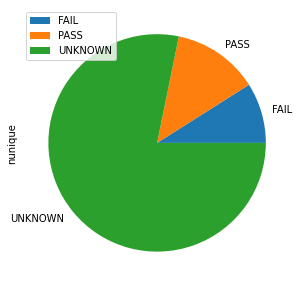

In [79]:
# Count the unique resources based on the rule result
df_merged.groupby('rule_result')['resource_type'].agg(
    ['nunique']).plot.pie(y='nunique',  figsize=(5, 5))

array([<AxesSubplot:ylabel='count'>, <AxesSubplot:ylabel='nunique'>],
      dtype=object)

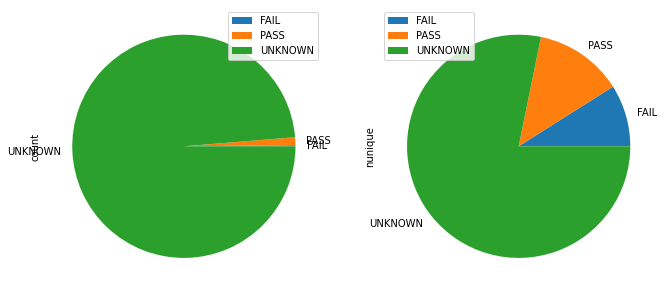

In [80]:
df_merged.groupby('rule_result')['resource_type'].agg(
    ['count','nunique']).plot.pie(subplots=True, figsize=(11, 6))